In [1]:
# Import modules
import sys
import os
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# Append the project root path to sys.path
sys.path.append(os.path.abspath("../scripts"))

In [4]:
# Import Custom Module
import Time_series_forcasting_models as tsfm

In [5]:
# Fetch and preprocess data
train, test = tsfm.fetch_and_preprocess_data('TSLA', '2015-01-01', '2025-01-31')

YF.download() has changed argument auto_adjust default to True



*********************100%***********************]  1 of 1 completed

In [6]:
# Display the first few rows of training data
train.head()

Ticker,TSLA
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(train)

# Extract the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation:
if result[1] <= 0.05:
    print("The series is likely stationary (reject the null hypothesis)")
else:
    print("The series is likely non-stationary (fail to reject the null hypothesis)")


ADF Statistic: -1.3071175481635393
p-value: 0.6259097682416385
The series is likely non-stationary (fail to reject the null hypothesis)


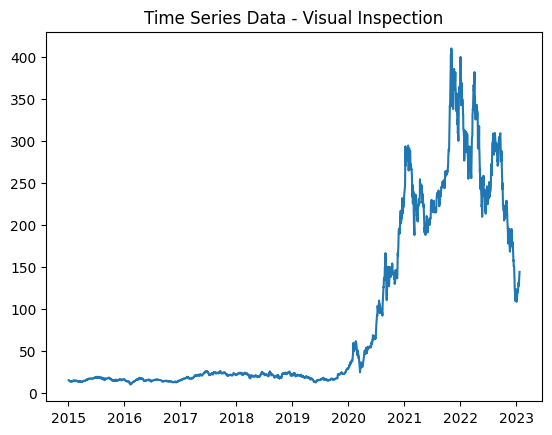

In [8]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.plot(train)
plt.title('Time Series Data - Visual Inspection')
plt.show()


In [9]:
# Train ARIMA model
arima_forecast, arima_model = tsfm.train_arima_model(train, test)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12684.802, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12680.726, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12679.653, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12679.753, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12678.997, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12680.805, Time=0.72 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.047 seconds


C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-11\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA Model Evaluation:
MAE: 89.9096
RMSE: 111.0784
MAPE: 34.61%


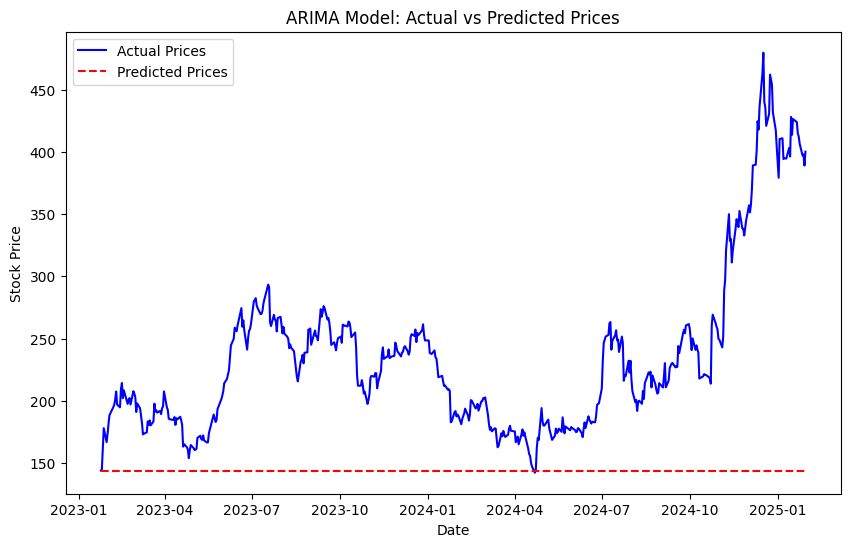

In [10]:
# Evaluate ARIMA model
tsfm.evaluate_model(test, arima_forecast, 'ARIMA')

In [11]:
# Train SARIMA model
sarima_forecast, conf_sarima, sarima_model = tsfm.train_sarima_model(train, test)


SARIMA Model Evaluation:
MAE: 130.1167
RMSE: 151.6919
MAPE: 49.62%


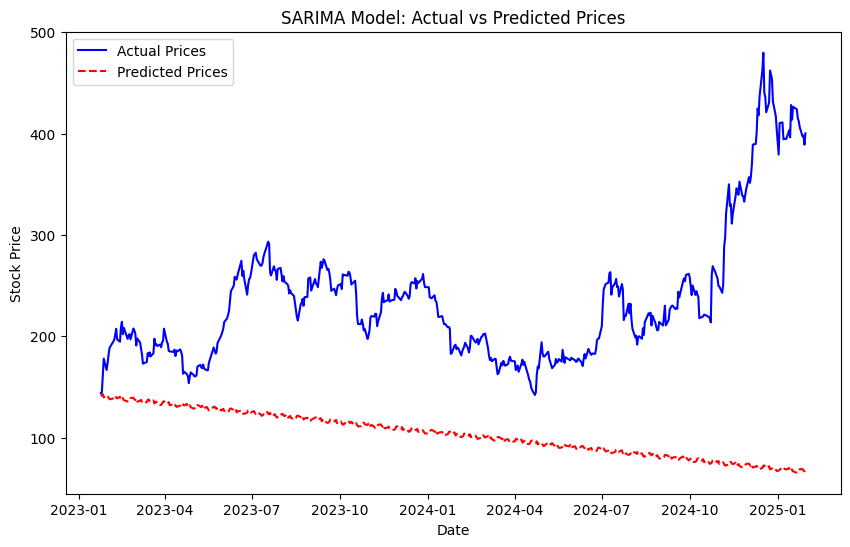

In [12]:
# Evaluate SARIMA model
tsfm.evaluate_model(test, sarima_forecast, 'SARIMA')

In [13]:
# Train LSTM model
lstm_forecast, lstm_model, data_scaler = tsfm.train_lstm_model(train, test, n_steps=60, epochs=20, batch_size=32)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-11\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0253
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0022
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0020
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0017
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0016
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0014    
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0014    
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0013
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0016
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0017
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0014
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0017    
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0012
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0010    
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - l

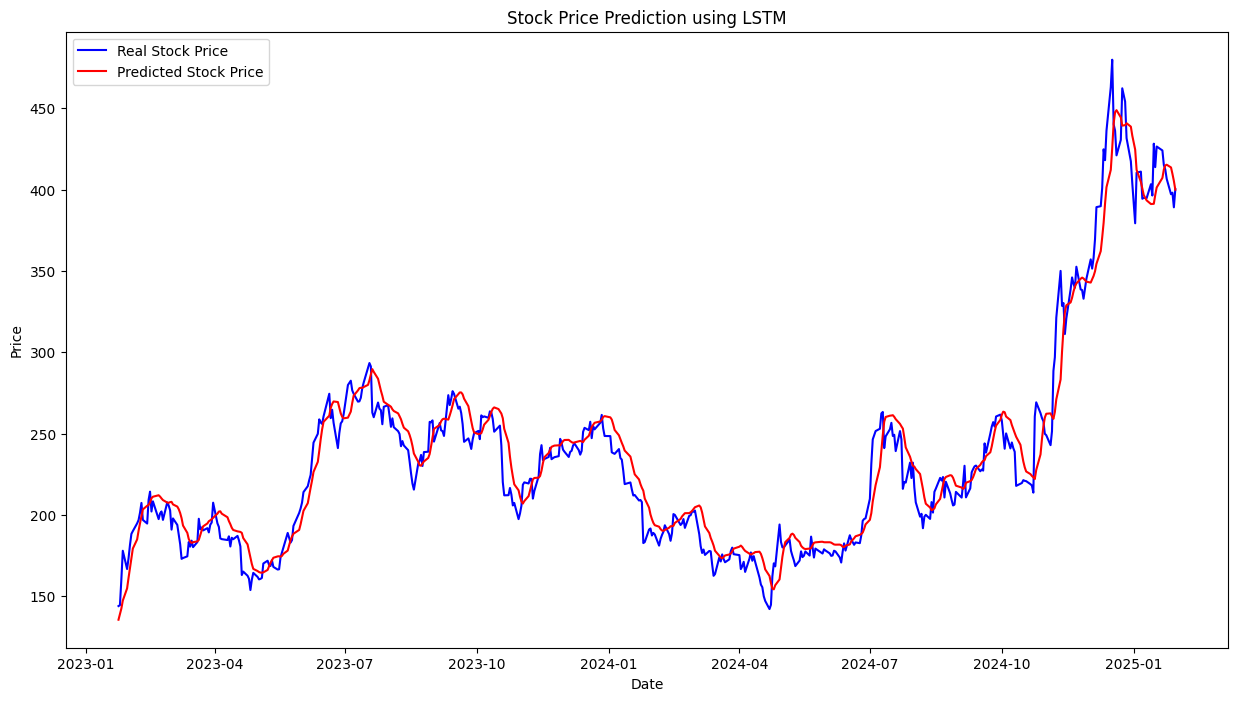

In [14]:
# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(test.index, test.values, color='blue', label='Real Stock Price')  # Real data
plt.plot(test.index, lstm_forecast, color='red', label='Predicted Stock Price')  # Predicted data
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure ltsm_forecast is a 1D array 
ltsm_forecast = np.array(lstm_forecast).ravel()  # Convert (507, 1) to (507,)

# Ensure test is also 1D
test = np.array(test).ravel()

# calculate MAE, RMSE, and MAPE 
mae = mean_absolute_error(test, lstm_forecast)
rmse = np.sqrt(mean_squared_error(test, lstm_forecast))
mape = np.mean(np.abs((test - lstm_forecast) / test)) * 100

print(f'LSTM Model Evaluation:')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAPE: {mape:.2f}%')


LSTM Model Evaluation:
MAE: 10.9028
RMSE: 14.3332
MAPE: 27.73%


In [17]:
# scaler for forecasting
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(train.values.reshape(-1,1))

array([[0.01259433],
       [0.01105916],
       [0.0112573 ],
       ...,
       [0.29369218],
       [0.30930188],
       [0.3351016 ]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/s

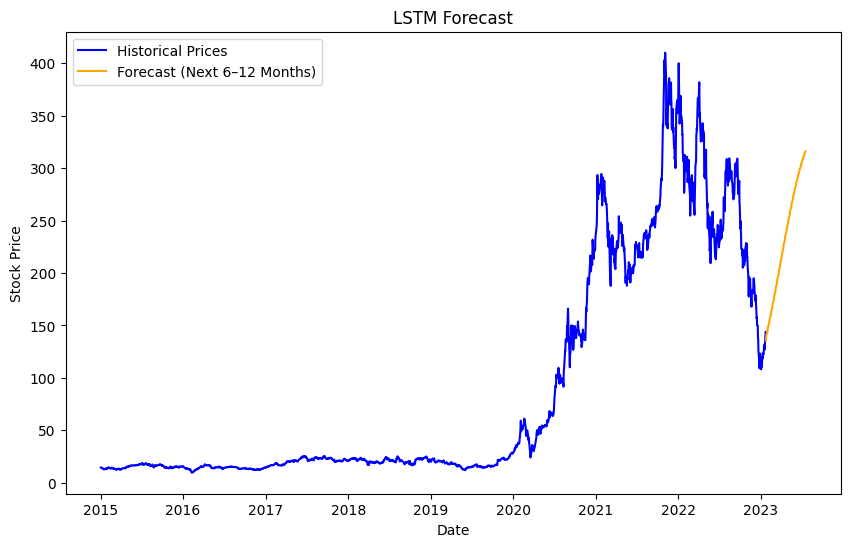

In [18]:
# forcast values for the next 6 month 
future_values_6mo, future_dates_6mo = tsfm.forecast_lstm_future(
    model=lstm_model,
    data_series=train,
    scaler=scaler,
    n_steps=60,      
    n_periods=126
)

In [19]:
# Interpret results
tsfm.interpret_results(future_values_6mo, future_dates_6mo)

Forecast Period: 2023-01-24 to 2023-07-18 (~6 months)
Trend: The forecast suggests a upward movement over this period.
Price change: from 135.50 to 315.87 (+133.12%).
Volatility (std): 54.44
Relative Volatility: 23.40% of average forecast value.

Potential Market Opportunity: The expected price increase may present buying opportunities.
Note: Volatility appears relatively high (std > 10% of mean). This implies greater uncertainty in the forecast.
